In [ ]:
!pip install nltk
!pip install -q wordcloud
!pip install matplotlib
!pip install vaderSentiment

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords


import nltk
nltk.download('stopwords');


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jneig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
stop = stopwords.words('english')

df = pd.read_csv("./datasets/M_manuel_depression_detection.csv", encoding="utf-8", sep=',')

df.rename(columns={'message to examine': 'text', 'label (depression result)': 'label'}, inplace=True)


import re

#Remove stopwords from the dataset
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# Remove links
df['text'] = df['text'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x))

# Remove twitter handles
df['text'] = df['text'].apply(lambda x : re.sub('@[^\s]+','',x))

# Remove Non A-Z or 0-9 characters 
df['text'] = df['text'].apply(lambda x : re.sub('[^\sa-zA-Z0-9]+','',x))

df['text'] = df['text'].apply(lambda x : re.sub('\bamp\b','',x))




display(df)

,text,label
0,Open discussion Between Transfer Portal NIL b...,1
1,Plenty things changing life lives around me Th...,1
2,I feel little hopeless Anyone else hopelessness,1
3,Which healthy Hope hopelessness hope Hopelessn...,1
4,So someone tell I get HOPELESSNESS I live worl...,1
...,...,...
39137,well cheers glass water handy ill drink cheer,0
39138,Is right Youre Palm SpringsGuess see local ne...,0
39139,Its best cafe AsakusaTokyo small serves best ...,0
39140,heeey tonight night sleeping like night loll,0


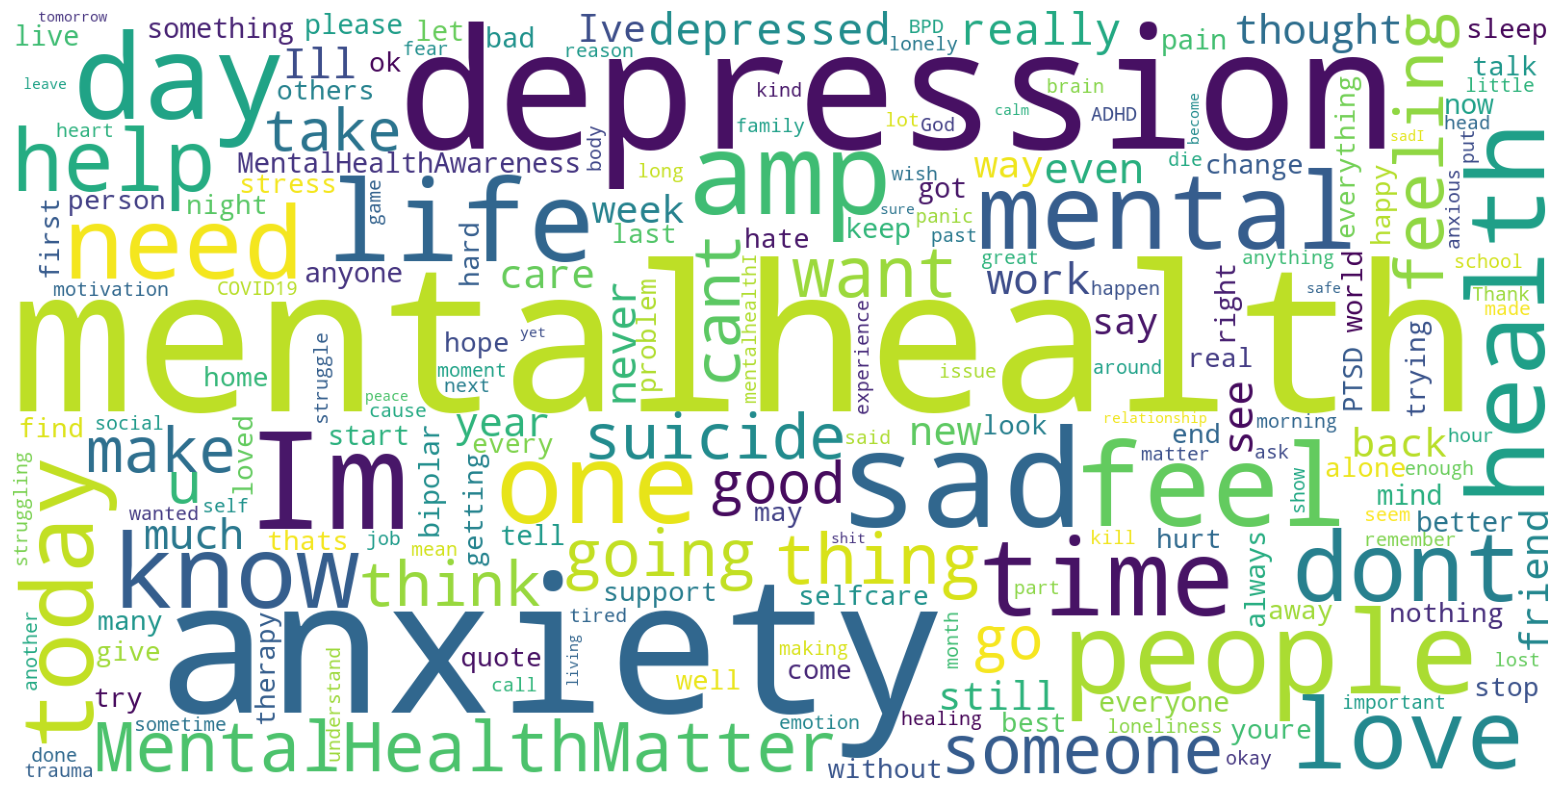

In [7]:
depressed_df = df[df['label'] == 1]

depressed_df.head(10)

text = depressed_df['text'].values
text= ''.join(text)

wordcloud = WordCloud(collocations = False, background_color = 'white', width=1600, height=800).generate(str(text))
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud);

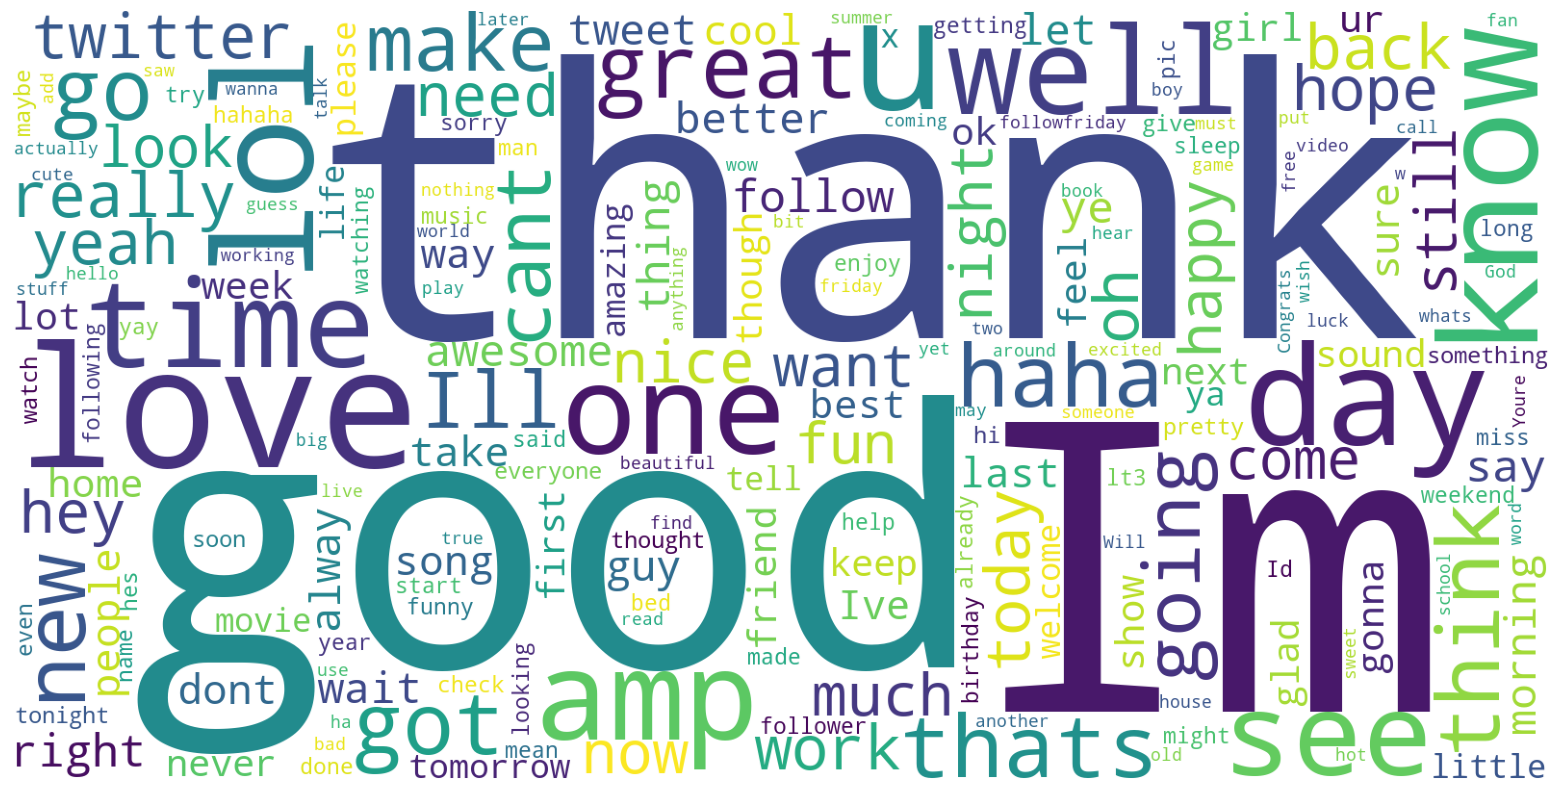

In [10]:
depressed_df = df[df['label'] == 0]

depressed_df.head(10)

text = depressed_df['text'].values
text= ''.join(text)

wordcloud = WordCloud(collocations = False, background_color = 'white', width=1600, height=800).generate(str(text))
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud);

C:\Users\jneig\AppData\Local\Temp\ipykernel_12684\2624343247.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'negative'] = sentiment['neg']
C:\Users\jneig\AppData\Local\Temp\ipykernel_12684\2624343247.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'neutral'] = sentiment['neu']
C:\Users\jneig\AppData\Local\Temp\ipykernel_12684\2624343247.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

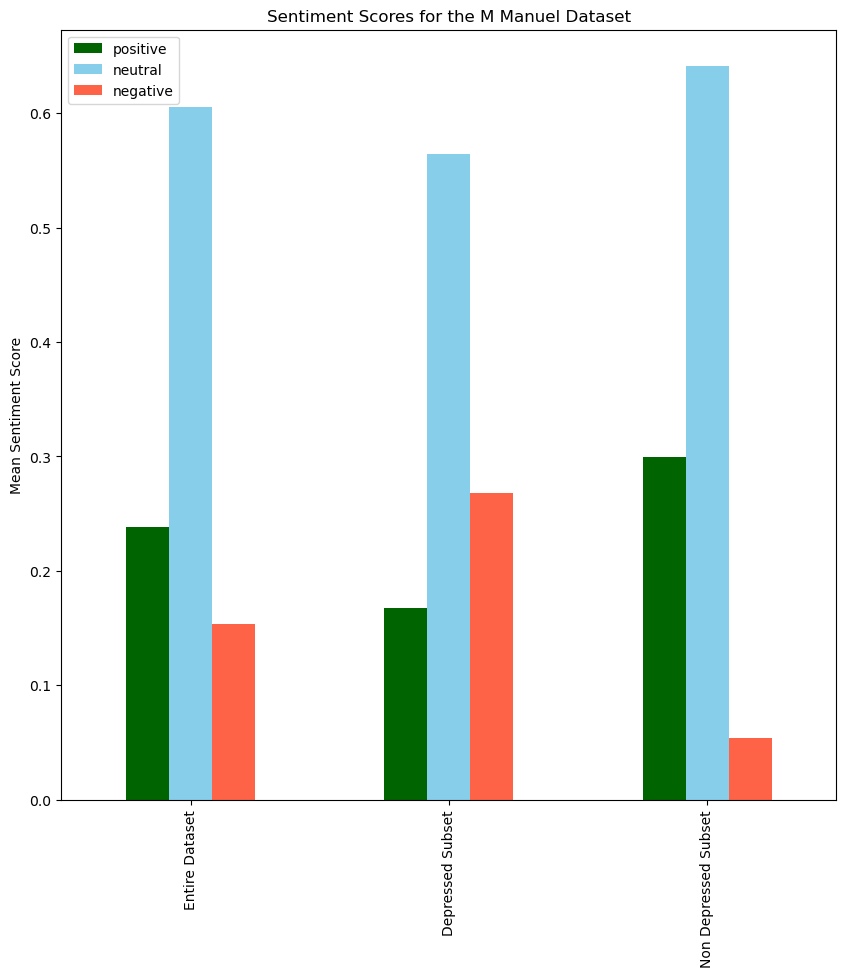

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

non_depressed_df = df[df['label'] == 0]

analyzer = SentimentIntensityAnalyzer()

for index, row in non_depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    non_depressed_df.at[index, 'negative'] = sentiment['neg']
    non_depressed_df.at[index, 'neutral'] = sentiment['neu']
    non_depressed_df.at[index, 'positive'] = sentiment['pos']
    non_depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
non_depressed_negative_mean = non_depressed_df.loc[:, 'negative'].mean()
non_depressed_neutral_mean = non_depressed_df.loc[:, 'neutral'].mean()
non_depressed_positive_mean = non_depressed_df.loc[:, 'positive'].mean()
non_depressed_compound_mean = non_depressed_df.loc[:, 'compound'].mean()


depressed_df = df[df['label'] == 1]

for index, row in depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    depressed_df.at[index, 'negative'] = sentiment['neg']
    depressed_df.at[index, 'neutral'] = sentiment['neu']
    depressed_df.at[index, 'positive'] = sentiment['pos']
    depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the depressed dataset
depressed_negative_mean = depressed_df.loc[:, 'negative'].mean()
depressed_neutral_mean = depressed_df.loc[:, 'neutral'].mean()
depressed_positive_mean = depressed_df.loc[:, 'positive'].mean()
depressed_compound_mean = depressed_df.loc[:, 'compound'].mean()


all_data = df.copy()

for index, row in all_data.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    all_data.at[index, 'negative'] = sentiment['neg']
    all_data.at[index, 'neutral'] = sentiment['neu']
    all_data.at[index, 'positive'] = sentiment['pos']
    all_data.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
all_data_negative_mean = all_data.loc[:, 'negative'].mean()
all_data_neutral_mean = all_data.loc[:, 'neutral'].mean()
all_data_positive_mean = all_data.loc[:, 'positive'].mean()
all_data_compound_mean = all_data.loc[:, 'compound'].mean()


d = {'positive': [all_data_positive_mean,depressed_positive_mean, non_depressed_positive_mean],'neutral': [all_data_neutral_mean,depressed_neutral_mean, non_depressed_neutral_mean],'negative': [all_data_negative_mean,depressed_negative_mean, non_depressed_negative_mean],  'compound': [all_data_compound_mean, depressed_compound_mean, non_depressed_compound_mean]}

dataset_averages_df = pd.DataFrame(data=d, index=['Entire Dataset', 'Depressed Subset', 'Non Depressed Subset'])

ax = dataset_averages_df.plot.bar(y=['positive', 'neutral', 'negative'], figsize=[10,10], color = ['darkgreen', 'skyblue', 'tomato'])
ax.set_ylabel("Mean Sentiment Score")
ax.set_title('Sentiment Scores for the M Manuel Dataset');


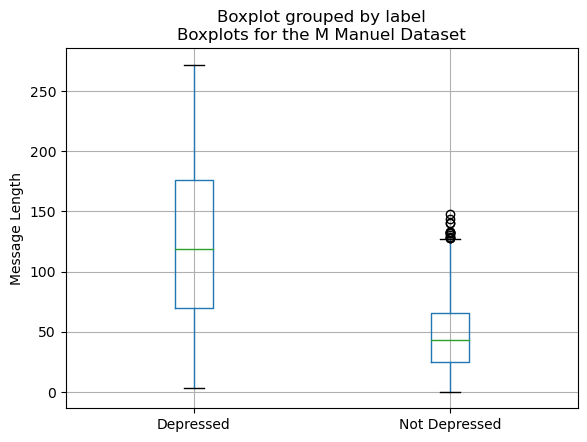

In [49]:
df1 = df.copy()

df1['label'] = df['label'].replace({1: 'Depressed', 0: 'Not Depressed'})

df1['Message Size'] = df1['text'].apply(lambda x : len(x))

ax = df1.boxplot(by='label')

ax.set_ylabel('Message Length')
ax.set_xlabel('');
ax.set_title('Boxplots for the M Manuel Dataset');


In [25]:
non_depressed = df[df['label'] == 0]
non_depressed.describe()

,label,message_size
count,20952.0,20952.000000
mean,0.0,46.856863
std,0.0,26.115003
min,0.0,0.000000
25%,0.0,25.000000
50%,0.0,43.000000
75%,0.0,66.000000
max,0.0,148.000000
